# Week 8 Seminar Answers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

## Question 1

In [2]:
data = yf.download("^GSPC", start="2019-11-11", end="2020-11-14")

[*********************100%***********************]  1 of 1 completed


In [3]:
S = data['Adj Close'][-1]
print('The spot price is', round(S,2))

The spot price is 3585.15


## Question 2 

Step 1: Find the log return of Index

In [4]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

Step 2: Calculate its standard deviation and annualised  it 

In [5]:
vol = np.sqrt(len(data)) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 34.73 %


And the spot value for VIX is 

In [6]:
VIX = yf.download("^VIX", start="2019-11-11", end="2020-11-14")

[*********************100%***********************]  1 of 1 completed


In [7]:
vix = VIX['Adj Close'][-1]
print('The market volatility is', round(vix,2), '%')

The market volatility is 23.1 %


## Question 3

In [8]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [9]:
K = 4000
T1 = 1 /12
r = 0.0083

In [10]:
call1 = euro_option_bs(S, K, T1, r, vol, 'call')
print('The BS call price is', round(call1,2))

The BS call price is 26.78


In [11]:
put1 = euro_option_bs(S, K, T1, r, vol, 'put')
print('The BS put price is', round(put1,2))

The BS put price is 438.87


In [12]:
SP500 = yf.Ticker("^GSPC")

In [13]:
opt1 = SP500.option_chain('2020-12-18')
call11 = opt1.calls.lastPrice[opt1.calls.strike == K]
print('The Market call price is', float(call11.values))

The Market call price is 1.34


In [14]:
put11 = opt1.puts.lastPrice[opt1.puts.strike == K]
print('The Market put price is', float(put11.values))

The Market put price is 439.92


## Question 4

In [15]:
T2 = 13 /12

In [16]:
call2 = euro_option_bs(S, K, T2, r, vol, 'call')
print('The BS call price is', round(call2,2))

The BS call price is 372.38


In [17]:
put2 = euro_option_bs(S, K, T2, r, vol, 'put')
print('The BS put price is', round(put2,2))

The BS put price is 751.42


In [18]:
opt2 = SP500.option_chain('2021-12-17')
call22 = opt2.calls.lastPrice[opt2.calls.strike == K]
print('The Market call price is', float(call22.values))

The Market call price is 87.1


In [19]:
put22 = opt2.puts.lastPrice[opt2.puts.strike == K]
print('The Market put price is', float(put22.values))

The Market put price is 573.0


## Question 5

In [20]:
call3 = euro_option_bs(S, K, T1, r, vix*0.01, 'call')
print('The BS call price is', round(call3,2))

The BS call price is 5.44


In [21]:
put3 = euro_option_bs(S, K, T1, r, vix*0.01, 'put')
print('The BS put price is', round(put3,2))

The BS put price is 417.53


In [22]:
call4 = euro_option_bs(S, K, T2, r, vix*0.01, 'call')
print('The BS call price is', round(call4,2))

The BS call price is 202.59


In [23]:
put4 = euro_option_bs(S, K, T2, r, vix*0.01, 'put')
print('The BS put price is', round(put4,2))

The BS put price is 581.64


The results using the VIX is much better.

## Question 6

In [24]:
K = np.linspace(3000,4000,11)
T = [1/52, 2/52, 1/12, 2/12, 1/4, 1/2, 1]

In [25]:
call = np.zeros((len(T),len(K)))
for i in range(len(T)):
    for j in range(len(K)):
        call[i,j] = euro_option_bs(S, K[j], T[i], r, vix*0.01, 'call')

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

strike, ttm = np.meshgrid(K, T)

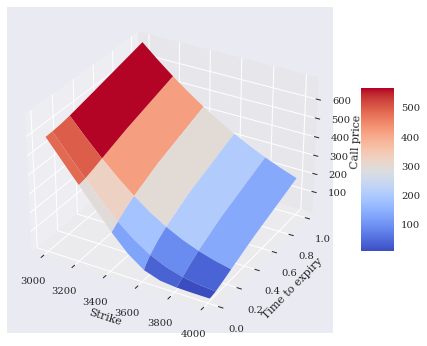

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, call, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Strike')
ax.set_ylabel('Time to expiry')
ax.set_zlabel('Call price')
fig.colorbar(surf, shrink=0.5, aspect=5);